In [1]:
pip install SimpleITK

     |████████████████████████████████| 44.9 MB 44 kB/s eta 0:00:018
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ipywidgets scipy

     |████████████████████████████████| 139 kB 3.2 MB/s eta 0:00:01
  Using cached scipy-1.11.3-cp39-cp39-macosx_10_9_x86_64.whl (37.3 MB)
     |████████████████████████████████| 2.3 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 57.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
from __future__ import print_function
import importlib
from distutils.version import LooseVersion

# check that all packages are installed (see requirements.txt file)
required_packages = {'jupyter', 
                     'numpy',
                     'matplotlib',
                     'ipywidgets',
                     'scipy',
                     'pandas',
                     'SimpleITK'
                    }

problem_packages = list()
# Iterate over the required packages: If the package is not installed
# ignore the exception. 
for package in required_packages:
    try:
        p = importlib.import_module(package)        
    except ImportError:
        problem_packages.append(package)
    
if len(problem_packages) == 0:
    print('All is well.')
else:
    print('The following packages are required but not installed: ' \
          + ', '.join(problem_packages))

All is well.


In [5]:
# import SimpleITK as sitk
# print(sitk.Version())
# sitk.Show(sitk.ReadImage("FullDataset/VOIs/image/LIDC-IDRI-0001_R_1.nii.gz"), "LIDC-IDRI-0001", debugOn=True)

In [7]:
pip install nibabel

     |████████████████████████████████| 3.3 MB 3.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [70]:
#Define the filepath to your NIfTI scan
scanFilePath = 'SampleDataset/CT/image/LIDC-IDRI-0001.nii.gz'
# scanFilePath = 'FullDataset/VOIs/image/LIDC-IDRI-0003_R_2.nii.gz'
# scanFilePath = 'FullDataset/VOIs/nodule_mask/LIDC-IDRI-0003_R_2.nii.gz'
 
#Load the scan and extract data using nibabel 
scan = nib.load(scanFilePath)
scanArray = scan.get_fdata()

In [71]:
#Get and print the scan's shape 
scanArrayShape = scanArray.shape
print('The scan data array has the shape: ', scanArrayShape)

The scan data array has the shape:  (512, 512, 133)


In [64]:
#Examine scan's shape and header 
scanHeader = scan.header
print('The scan header is as follows: \n', scanHeader)

The scan header is as follows: 
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 55 48 12  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.       0.820312 0.820312 2.5      0.       0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : -49.285774
qoffset_y       : -5

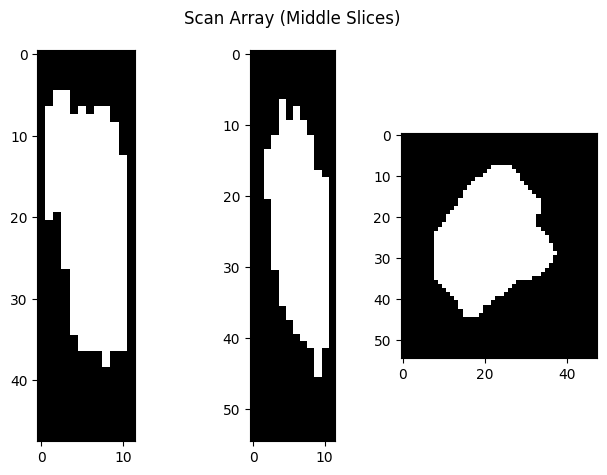

In [65]:
#Display scan array's middle slices
fig, axs = plt.subplots(1,3)
fig.suptitle('Scan Array (Middle Slices)')
axs[0].imshow(scanArray[scanArrayShape[0]//2,:,:], cmap='gray')
axs[1].imshow(scanArray[:,scanArrayShape[1]//2,:], cmap='gray')
axs[2].imshow(scanArray[:,:,scanArrayShape[2]//2], cmap='gray')
fig.tight_layout()
plt.show()

In [66]:
#Calculate proper aspect ratios
pixDim = scanHeader['pixdim'][1:4]
aspectRatios = [pixDim[1]/pixDim[2],pixDim[0]/pixDim[2],pixDim[0]/pixDim[1]]
print('The required aspect ratios are: ', aspectRatios)


The required aspect ratios are:  [0.32812482, 0.32812482, 1.0]


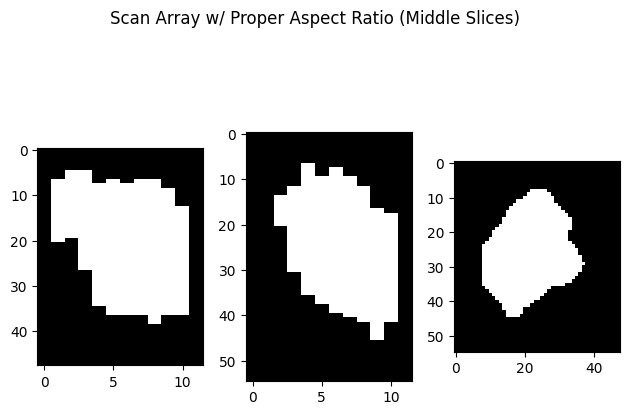

In [67]:
#Display scan array's middle slices with proper aspect ratio
fig, axs = plt.subplots(1,3)
fig.suptitle('Scan Array w/ Proper Aspect Ratio (Middle Slices)')
axs[0].imshow(scanArray[scanArrayShape[0]//2,:,:], aspect = aspectRatios[0], cmap='gray')
axs[1].imshow(scanArray[:,scanArrayShape[1]//2,:], aspect = aspectRatios[1], cmap='gray')
axs[2].imshow(scanArray[:,:,scanArrayShape[2]//2], aspect = aspectRatios[2], cmap='gray')
fig.tight_layout()
plt.show()